<a href="https://colab.research.google.com/github/Shazmin-dev/Capstone-Project/blob/main/Self_study_try_it_activity_7_1_Applying_Oversampling_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Self-study try-it activity 7.1: Applying oversampling in Python

In [1]:
import seaborn as sns
import numpy as np
import sklearn
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import model_selection
from matplotlib.patches import Patch
import matplotlib.pyplot as plt

# Oversampling

In this notebook, you’ll explore how oversampling can improve predictions when the class of interest has significantly fewer examples than other classes. This is a common issue that is known as class imbalance. This situation often arises in real-world contexts such as fraud detection or diagnosing rare diseases.

The notebook is organised into three parts:

- Part one: create training and validation sets using random sampling (no oversampling).

- Part two: create training and validation sets using stratified sampling (with oversampling).

- Part three: compare the results from parts one and two by answering a few questions in the markdown cell below.

**Note: All required packages have already been imported into the notebook.**

## Data creation

You’ll use a handy function from scikit-learn called `make_classification` to create a synthetic data set for testing classification models. This is especially useful when you need a quick data set to experiment with or want to compare different approaches.

**The class of interest in this exercise is class 0, which includes all points for which y = 0.**

Number of data points in first class 54
Number of data points in second class 946


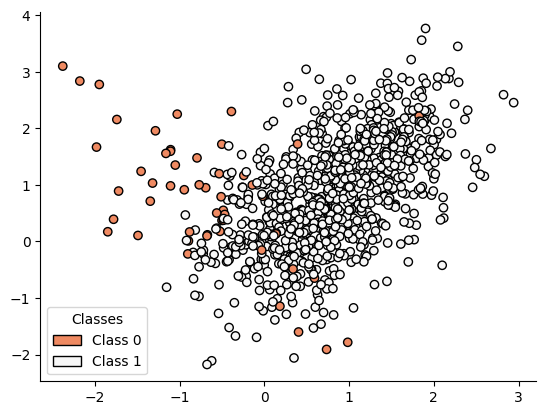

In [2]:
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2,
                           n_redundant=0, n_repeated=0, n_classes=2,
                           n_clusters_per_class=1,
                           weights=[0.05, 0.95],
                           class_sep=0.8, random_state=0)


colors = ['#ef8a62' if v == 0 else '#f7f7f7'  for v in y]
legend_elements = [
    Patch(facecolor='#ef8a62', edgecolor='black', label='Class 0'),
    Patch(facecolor='#f7f7f7', edgecolor='black', label='Class 1'),
    ]
plt.legend(handles=legend_elements, title='Classes')
kwarg_params = {'linewidth': 1, 'edgecolor': 'black'}
fig = plt.Figure(figsize=(12,6))
plt.scatter(X[:, 0], X[:, 1], c=colors, **kwarg_params)
sns.despine()

print(f'Number of data points in first class {len(X[np.where(y==0)])}')
print(f'Number of data points in second class {len(X[np.where(y==1)])}')


## Machine learning model

You’ll use a support vector machine (SVM) classifier as the model for this exercise. You'll explore how SVMs work later in the programme, but for now, you'll work with the built-in implementation from scikit-learn. Use the provided `train_and_predict` function to train the model and generate predictions.

In [3]:
# Do not edit this cell

def train_and_predict(train, validation):
    """Function to fit sklearn support vector classification model and make predictions on the validation set
    :param train: the training set as a numpy array of length N_trainx(D+1) where N_train is the number of
    training points and D is the dimensions of X (in this case 2). The extra column is the y values.
    param validation: the validation set as a numpy array similar to train but for the validation set"""

    clf = svm.SVC()
    clf.fit(train[:, :2], train[:, 2])
    predictions = clf.predict(validation[:, :2])
    return predictions

## Part one

First, you’ll test how the model performs without applying any oversampling.

### To do: ###

1. Split the data set into 50 per cent training and 50 per cent validation sets, ignoring the class labels (i.e. no oversampling). For both sets, ensure that the first column contains the input X and the second column contains the target y, formatted as a NumPy array [X1, y].

2. Use the `train_and_predict` function to train the model on the training set and make predictions on the validation set.

3. Calculate and print the percentage of correct and incorrect predictions.

4. Calculate and print the percentage of correct predictions for the class of interest (class 0).

**Hint: Use the `train_test_split` from https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html to split the data. For consistency, include `random_state=1` in the `train_test_split` function.**

In [4]:
### ANSWER ###

data = np.concatenate([X, np.expand_dims(y, axis=1)], axis=1)
train, validation = sklearn.model_selection.train_test_split(data, test_size= 0.5, shuffle=True, random_state=1)
predictions = train_and_predict(train, validation)
validation_ys = validation[:, 2]
print('% correct predictions:', (validation_ys == predictions).sum()/len(validation_ys))
print('% incorrect predictions:', (validation_ys != predictions).sum()/len(validation_ys))

indices = np.where(validation_ys == 0)

print('% correct predictions on class of interest:', (validation_ys[indices] ==
                                                      predictions[indices]).sum()
      /len(validation_ys[indices]))

% correct predictions: 0.972
% incorrect predictions: 0.028
% correct predictions on class of interest: 0.43478260869565216


## Part two

Now you’ll repeat the process but this time using oversampling to focus more on the class of interest.

Note: Oversampling is manual in this example case (not using a library such as SMOTE, but rather balancing classes manually by yourself using random sampling).

### To do: ###
1. Split the data into two groups (strata):
    - Set A: all samples of the class of interest
    - Set B: all remaining samples

2. Create the training set:
    - Randomly select 50 per cent of the samples from set A.
    - Add an equal number of randomly selected samples from set B.

3. Create the validation set:
    - Use the remaining 50 per cent of samples from set A.
    - Add enough samples from set B to restore the original class ratio from the full data set.

**Hint**: Use the `train_test_split` function from https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html to divide the data. For consistency, include `random_state=1` in the `train_test_split` function.

In [5]:
### ANSWER ###

set_a = np.concatenate([X, np.expand_dims(y, axis=1)], axis=1)[np.where(y==0)]
set_b = np.concatenate([X, np.expand_dims(y, axis=1)], axis=1)[np.where(y!=0)]

# Randomly select 50 per cent of the training samples from set A

set_a_train, set_a_validation = train_test_split(set_a,test_size=0.5, shuffle=True, random_state=1)
set_b_train, set_b_validation = train_test_split(set_b,test_size= 1-len(set_a_train)/len(set_b), shuffle=True, random_state=1)
train = np.concatenate([set_a_train, set_b_train])
validation = np.concatenate([set_a_validation, set_b_validation[:int((len(set_a_validation)* len(set_b))/len(set_a)), :]])


In the cell below, write code to check that the ratio of set A to set B in the validation set matches the original class ratio in the full data set. This ensures the validation set reflects the original class distribution accurately.

In [6]:
print(len(set_a_validation)/len(set_b_validation[:int((len(set_a_validation) * len(set_b))/len(set_a)), :]))
print(len(set_a)/len(set_b))

0.05708245243128964
0.05708245243128964


## Part three

For the oversampling method:

1. Calculate and report the overall accuracy of the model’s predictions on the validation dataset.

- This means calculating the percentage of all predictions that are correct out of the total number of samples in the validation set.

- In addition, calculate and report the percentage of incorrect predictions as a complementary metric.

2. Calculate and report the accuracy specifically for the class of interest (class label 0) in the validation data set.

- Identify the samples that belong to the class of interest.

- Compute the percentage of these samples for which the model’s predictions match the true labels.

- This highlights the model’s performance on the specific class, which can be especially useful if it's an imbalanced data set or the class of interest is more critical to assess.

In [7]:
### ANSWER ###

predictions = train_and_predict(train, validation)
validation_ys = validation[:, 2]
print('% correct predictions:', (validation_ys == predictions).sum()/len(validation_ys))
print('% incorrect predictions:', (validation_ys != predictions).sum()/len(validation_ys))

indices = np.where(validation_ys == 0)

print('% correct predictions on class of interest:', (validation_ys[indices] ==
                                                      predictions[indices]).sum()
      /len(validation_ys[indices]))

% correct predictions: 0.922
% incorrect predictions: 0.078
% correct predictions on class of interest: 0.7777777777777778


### To do: ###

Answer the following questions in a markdown cell:

1. What effect did oversampling have on the accuracy of prediction for the class of interest?

2. What effect did oversampling have on the overall predictive accuracy for all classes?

3. When might this trade-off be acceptable or even preferred?

### Answer: ###

1. Oversampling dramatically increased the accuracy of prediction for the class of interest.

2. Oversampling decreased the total correct predictions.

3. This trade-off might be acceptable when the under-represented class is the one you care most about, such as in the case of fraud or cancer detection, even if it means misclassifying more cases from the other classes.